# Julia言語と高校数学

このノートブックでは、Julia言語を使って高校数学の様々な分野を学習します。

Juliaはを用いて、数学の概念を直感的に表現できます。

![自己紹介](./p01.png)

## 1. Julia言語の概要

Juliaは統計処理や科学技術計算、機械学習に強いプログラミング言語です。
Google Colabで無料で利用できるようになりました。

**特徴：**
- 高速な数値計算
- 数学的記法に近い文法
- 豊富な数学・統計ライブラリ

公式サイト: https://julialang.org/

![Julialang](./julialang.png)

https://zenn.dev/dannchu/articles/296dce4bf7c701

![colab](./googlecolab.png)





## 2. 基本的な計算

In [6]:
# 四則演算
1+1

2

In [7]:
2^10

1024

In [8]:
10 ÷ 3  # ÷は\divで入力

3

In [9]:
# 数学定数
π   #πは\pi + tab で入力

π = 3.1415926535897...

In [10]:
√2    # √は\sqrt +tab で入力

1.4142135623730951

In [11]:
ℯ   # ℯは\euler + tab で入力

ℯ = 2.7182818284590...

In [12]:
# 代入・計算

x = 1

1

In [13]:
y = 4

4

In [14]:
2x-4y

-14

In [15]:
ϕ = (1 + √5)/2

1.618033988749895

In [16]:
ϕ^2 - ϕ + 1

2.0

In [17]:
# 分数計算（小数と有理数の違い）
1/3 + 3*2/4     # 小数計算

1.8333333333333333

In [18]:
1//3 + 3*2//4   # //で有理数


11//6

In [19]:
12//8   # 有理数の約分

3//2

In [20]:
# 関数の定義
f(x) = x^2 + 2x - 4

f (generic function with 1 method)

In [21]:
f(0), f(2), f(-1), f(√2)

(-4, 4, -5, 0.8284271247461907)

## 3. グラフ描画

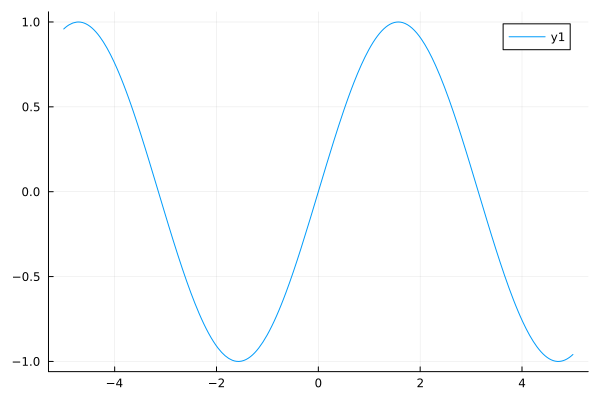

In [22]:
using Plots #描画パッケージ
plot(sin)


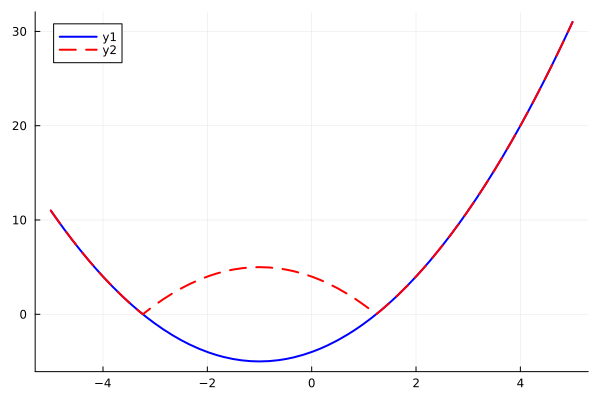

In [23]:
# 2次関数のグラフ
f(x) = x^2 + 2x - 4
g(x) = abs(f(x))

plot(f, lw=2,color=:blue)
plot!(g, lw=2,ls=:dash, color=:red)


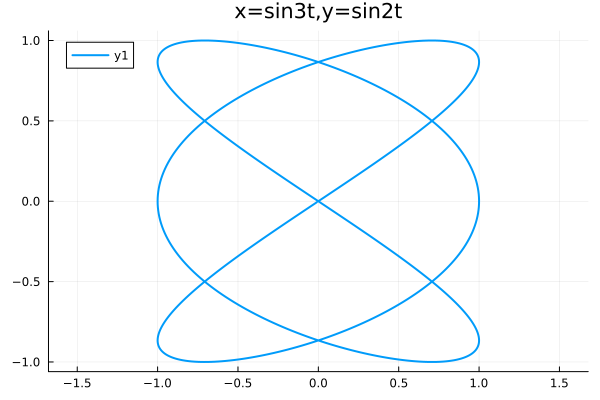

In [24]:
# 媒介変数表示（リサージュ曲線）
t = 0:0.01:2π
xs = sin.(3t)
ys = sin.(2t)

plot(xs, ys, aspectratio=true,lw=2,title="x=sin3t,y=sin2t")

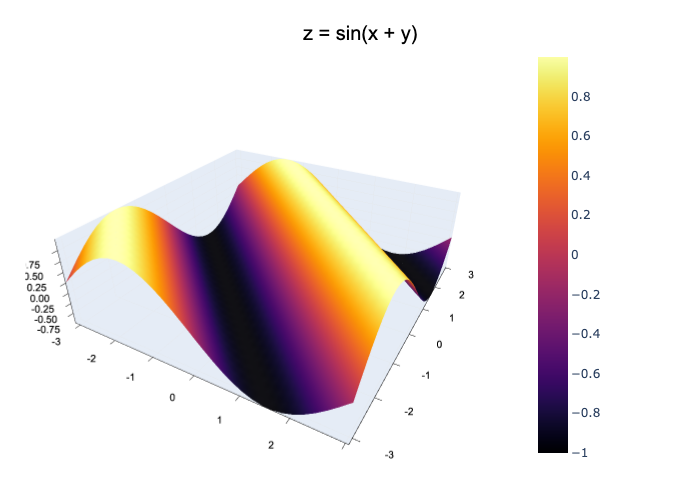

In [25]:
# 3D曲面
plotlyjs()
x = -π:0.2:π
y = -π:0.2:π
z = [sin(xi + yi) for xi in x, yi in y]

surface(x, y, z, title="z = sin(x + y)")

## 4. 方程式の解法

In [26]:
# 記号的解法
# using Pkg
# Pkg.add("Nemo")
# Pkg.add("Symbolics")

using Nemo , Symbolics

@variables x
f(x) = x^2 + 2x - 4

println("x² + 2x - 4 = 0 の解:")
symbolic_solve(f(x),x)


x² + 2x - 4 = 0 の解:


2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 -1 + √(5)
 -1 - √(5)

In [27]:
# 解の公式の一般形

@variables a b c x
println("ax² + bx + c = 0 の解:")
symbolic_solve(a*x^2 + b*x + c, x)

ax² + bx + c = 0 の解:


2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 (-b + √(-4a*c + b^2)) / (2a)
 (-b - √(-4a*c + b^2)) / (2a)

In [28]:
# 数値的解法
# using Pkg
# Pkg.add("SimplePolynomials")

using SimplePolynomials

x = getx()
println("x⁵ - 1 = 0 の解（5次単位根）:")
Z = SimplePolynomials.roots(x^5 - 1)

x⁵ - 1 = 0 の解（5次単位根）:


5-element Vector{ComplexF64}:
 -0.8090169943749478 - 0.5877852522924731im
 -0.8090169943749478 + 0.5877852522924731im
 0.30901699437494723 - 0.9510565162951534im
 0.30901699437494723 + 0.9510565162951534im
  0.9999999999999999 + 0.0im

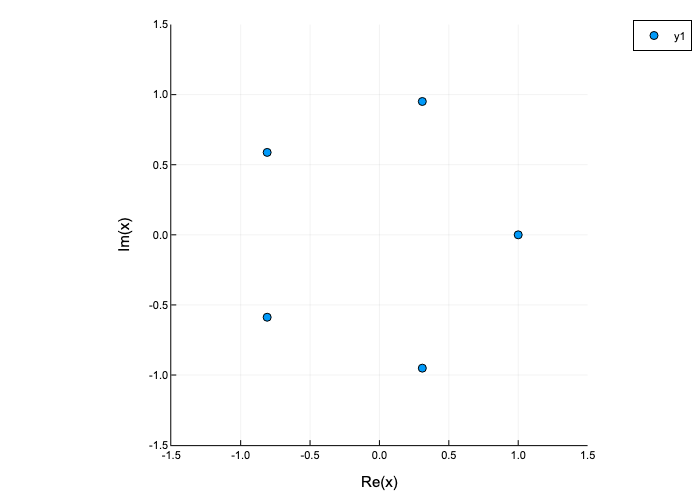

In [29]:
#複素数平面上に図示

using Plots
scatter(Z,
          xlim=(-1.5,1.5),
          ylim=(-1.5,1.5),
          aspectratio=true)

## 5. 漸化式と数列

In [30]:
# 漸化式 a₁ = 3, aₙ₊₁ = 2aₙ + 1
function seq_a(n::Int)
    if n == 1
        3
    elseif n ≥ 2
        2 * seq_a(n - 1) + 1
    end
end

# 最初の10項を表示
println("数列の最初の10項:")
for i in 1:10
    println("a($i) = ", seq_a(i))
end

数列の最初の10項:
a(1) = 3
a(2) = 7
a(3) = 15
a(4) = 31
a(5) = 63
a(6) = 127
a(7) = 255
a(8) = 511
a(9) = 1023
a(10) = 2047


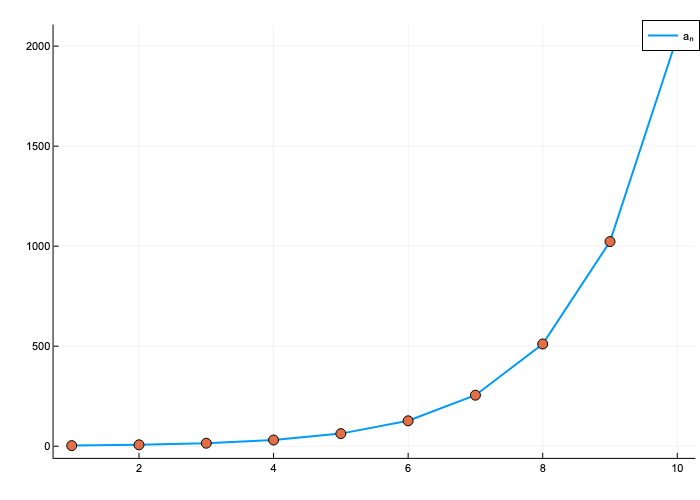

In [31]:
# 数列のグラフ化
using Plots 
X = 1:10
Y = seq_a.(X)

plot(X, Y, label="aₙ", lw=2)
scatter!(X, Y, label="", markersize=5)

## 6. 最適化問題


- $3x+4y \leqq 10$，$4x+y \leqq 4$，$x \geqq 0$，$y \geqq 0$ のとき，$x+y$の最大値・最小値は？

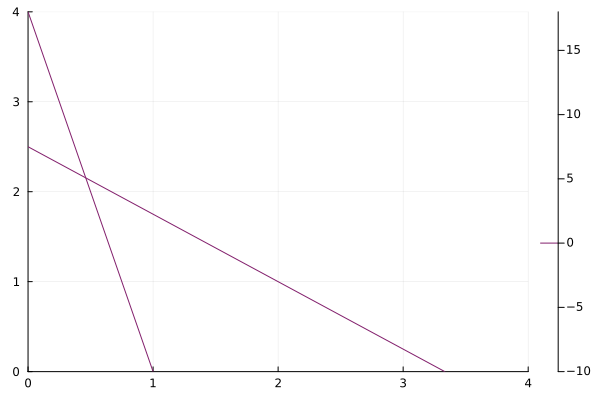

In [33]:
using Plots
gr()
#陰関数表示
contour(0:0.01:4,0:0.01:4,(x,y)->3x+4y-10,levels=[0])
contour!(0:0.01:4,0:0.01:4,(x,y)->4x+y-4,levels=[0])

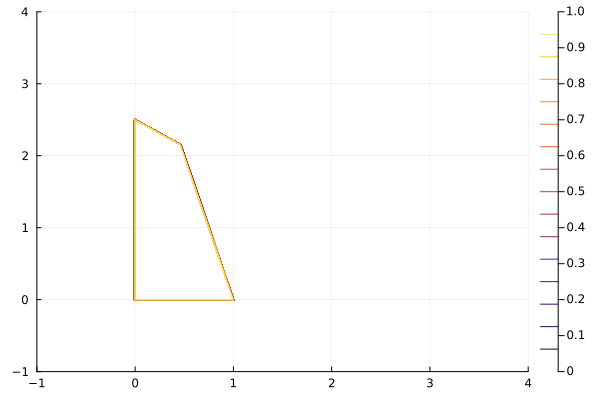

In [35]:
gr()
function f(x,y)
    if 3x+4y ≤ 10 && 4x+y ≤ 4 && x ≥ 0 && y ≥ 0
        1
    else 0
    end
end

contour(-1:0.01:4,-1:0.01:4,f)

In [36]:
function optimize_z()
    z_vals = Float64[]
    for x = 0:0.001:1 , y = 0:0.001:4
        if f(x,y) == 1
          xs , ys = x , y
          zs = xs + ys
          push!(z_vals, zs)
        end
    end
    return minimum(z_vals), maximum(z_vals)
end

t = optimize_z()
println("最小値は$(t[1])，最大値は$(t[2])")

最小値は0.0，最大値は2.6149999999999998


- $a$，$b$を正の実数とする。$\displaystyle{a^3+b^3-2ab}$の最大値を求めよ。

In [38]:
using Optim

# 目的関数（2変数関数を想定。xはベクトル）
f(x) = x[1]^3+x[2]^3-2*x[1]*x[2]

# 初期値（適当でOK）
x0 = [0.2, 0.2]

# 制約条件: a > 0, b > 0
lower = [1e-6, 1e-6]  # 0に近い正の値
upper = [1.0, 1.0]  # 適当な大きい値（必要なら調整）

# 最適化
result = optimize(f, lower, upper, x0)

# 最適解
x_opt = Optim.minimizer(result)

# 最小値
min_f = Optim.minimum(result)

println("最適な (a, b) = ", x_opt)
println("最小値 f(a, b) = ", min_f)

最適な (a, b) = [0.6666666665991605, 0.6666666665991605]
最小値 f(a, b) = -0.2962962962962963


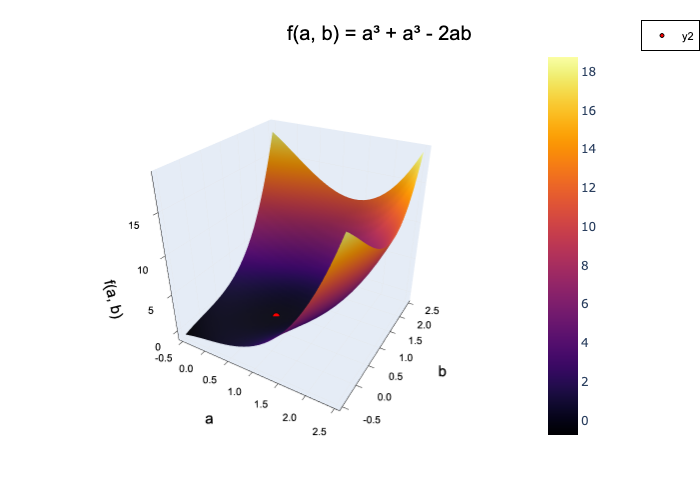

In [40]:
using Plots
plotlyjs()

# 関数の3Dプロット
x_range = -0.5:0.1:2.5
y_range = -0.5:0.1:2.5
z_vals = [xi^3 + yi^3 - 2*xi*yi for xi in x_range, yi in y_range]

surface(x_range, y_range, z_vals, 
        title="f(a, b) = a³ + a³ - 2ab",
        xlabel="a",
        ylabel="b",
        zlabel="f(a, b)")

# 最適解をプロット上に表示
scatter3d!([x_opt[1]], [x_opt[2]], [min_f], 
           color=:red, 
           markersize=2)

## 7. 統計・分布

ある高校の生徒150名を無作為に選んで調査したところ、スマートフォンを所有している生徒は126名でした。

この高校の生徒全体におけるスマートフォン所有率（母比率 p）について、信頼度95%の信頼区間を求めなさい。

#### 与えられた情報
- 標本サイズ：n = 150名
- スマートフォン所有者数：x = 126名
- 標本比率：p̂ = 126/150 = 0.84
- 信頼度：95%（有意水準 α = 0.05）

#### 理論
標本比率 p̂ は近似的に正規分布 N(p, p(1-p)/n) に従います。
信頼区間は p̂ ± z_{α/2} × √(p̂(1-p̂)/n) で計算されます。

In [41]:
# 母比率の信頼区間（Wald法）

using Distributions #分布パッケージ

# 与えられた値
n = 150
x = 126
p̂ = x / n
α = 0.05

# 標準誤差
se = sqrt(p̂ * (1 - p̂) / n)

# z値（95%信頼区間）
z = cquantile(Normal(), α/2) #z値

# 信頼区間計算
lower = p̂ - z * se
upper = p̂ + z * se

println("母比率 p の95%信頼区間: ($(round(lower, digits=4)), $(round(upper, digits=4)))")

母比率 p の95%信頼区間: (0.7813, 0.8987)


(p_L, p_U) = confint_bin_wald(k; n, α) = (0.7813318902354783, 0.8986681097645216)


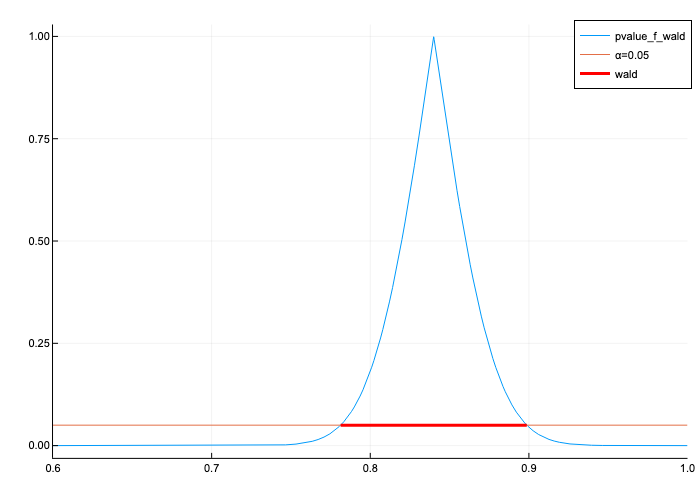

In [42]:
using Distributions #分布パッケージ
# P値関数（Wald）
function pvalue_f_wald(k, p, n)
    p̂ = k/n
    2ccdf(Normal(),abs(p̂ - p)/√(p̂ *(1-p̂)/n))
end


#Waldの信頼区間
function confint_bin_wald(k; n, α=0.05)
    p̂ = k/n
    z = cquantile(Normal(), α/2) # z値
    se = sqrt(p̂ * (1 - p̂) / n) # 標準誤差
    p̂ - z * se ,  p̂ + z * se
end

k , n  = 126 , 150
α = 0.05

using StatsPlots
plot(p->pvalue_f_wald(k,p,n),label="pvalue_f_wald",xlim=(0.6,1))
plot!(x->α,label="α=0.05")
@show p_L, p_U = confint_bin_wald(k; n,α)
plot!([p_L, p_U], fill(0.05, 2); lw=3, c=:red, label="wald")

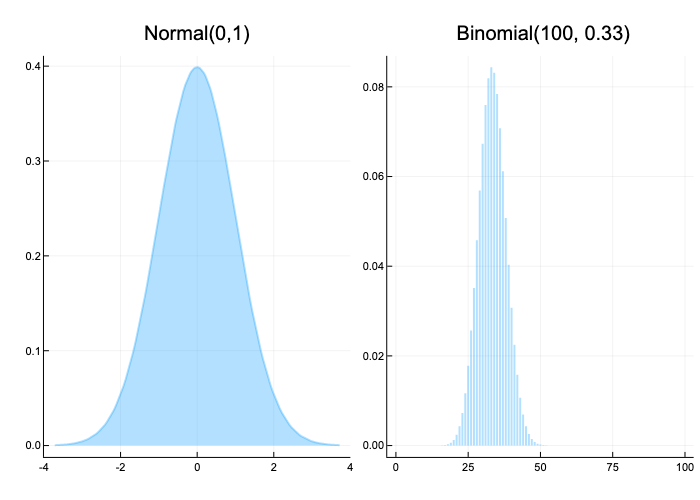

In [43]:
# 正規分布と二項分布の可視化
using StatsPlots
plotlyjs()
# 正規分布
p1 = plot(Normal(0, 1), 
         xlim=(-4, 4), 
         title="Normal(0,1)", 
         lw=2, 
         fill=true, 
         alpha=0.3,label=false)

# 二項分布
n_binom = 100
p_binom = 1/3
binom_dist = Binomial(n_binom, p_binom)

p2 = plot(binom_dist, 
         title=" Binomial($n_binom, $(round(p_binom, digits=2)))", 
         lw=2, 
         fill=true, 
         alpha=0.3,label=false)


plot(p1, p2, layout=(1, 2), size=(800, 300))

## 8. 数値積分

In [44]:
# ∫₀¹ sin(x²) dx をモンテカルロ法で計算（フレネル積分）
using Distributions

function montecarlo(f, a, b, n)
    sum(f(rand(Uniform(a, b))) for _ = 1:n) / n * (b - a)
end

f(x) = sin(x^2)
result = montecarlo(f, 0, sqrt(π), 10^6)

println("∫_0^√π sin(x²) dx ≈ ", result)

using QuadGK

result2 = quadgk(f,0,sqrt(π))
println("理論値（フレネル積分）≈ $(result2[1])")

∫_0^√π sin(x²) dx ≈ 0.8962133317230548
理論値（フレネル積分）≈ 0.894831469484145


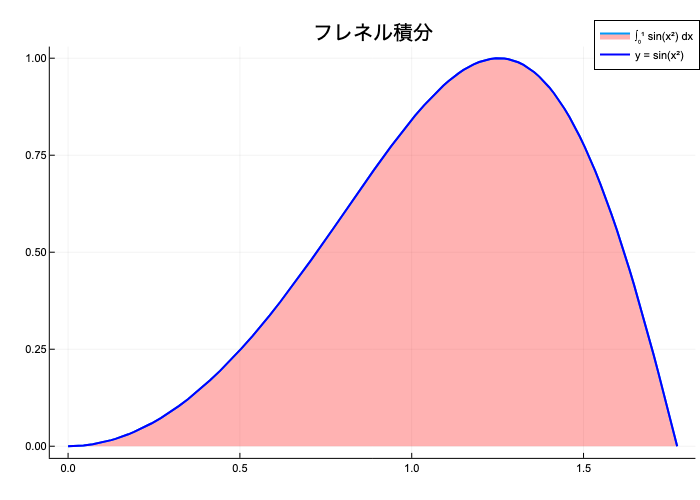

In [45]:
# 被積分関数の可視化\n",

plot(f, 0, sqrt(π), fill=(0, 0.3, :red), label="∫₀¹ sin(x²) dx", lw=2)
plot!(x -> sin(x^2), 0, sqrt(π), label="y = sin(x²)", lw=2, color=:blue)
title!("フレネル積分")

## 9. 整数問題・場合の数・確率

In [46]:
# ある整数を3で割ると2余り、5で割ると2余る。
# 最小のものを求める

for n = 1:15
  if mod(n,3)==1 && mod(n,5)==2
    println("最小のnは$n")
    break
  end
end

最小のnは7


In [47]:
# 1から9までの数字から3つ選んで3桁の整数を作る
using Combinatorics

X = [i for i in 1:9]
Y = permutations(X, 3) |> collect

println("(1) 全部で ", length(Y), " 通り")

# 奇数の個数
odd_count = sum(1 for y in Y if y[3] % 2 == 1)
println("(2) 奇数は ", odd_count, " 個")

(1) 全部で 504 通り
(2) 奇数は 280 個


In [48]:
# 確率のシミュレーション：赤玉3個、白玉5個から2個取り出す
P = "🔴 🔴 🔴 ⚪ ⚪ ⚪ ⚪ ⚪"
Q = combinations(split(P, " "), 2) |> collect

# (1) 2個とも赤玉の確率（理論値）
prob_2red = sum(1 for q in Q if q[1] == "🔴" && q[2] == "🔴") // length(Q)
println("2個とも赤玉の確率（理論値）: ", prob_2red)

# (2) 1個赤玉、1個白玉の確率（理論値）
prob_1red1white = sum(1 for q in Q if q[1] != q[2]) // length(Q)
println("1個赤玉、1個白玉の確率（理論値）: ", prob_1red1white)

2個とも赤玉の確率（理論値）: 3//28
1個赤玉、1個白玉の確率（理論値）: 15//28


In [49]:
# モンテカルロシミュレーション
n = 10^6
k = 0

for i = 1:n
    q = rand(Q)
    k += (q == ["🔴", "🔴"])
end

println("\n10^6回の実験による2個とも赤玉の確率: ", k/n)
println("理論値: ", float(prob_2red))


10^6回の実験による2個とも赤玉の確率: 0.107815
理論値: 0.10714285714285714


## 10. まとめ

このノートブックでは、Julia言語を使って高校数学の様々な分野を学習しました：

### 学習した内容

1. **Julia言語の概要**: 
2.  **基本計算**: 四則演算、関数定義、数学定数
3. **グラフ描画**: 2D・3D関数、媒介変数表示、リサージュ曲線
4. **方程式の解法**: 記号的解法（解の公式）と数値的解法
5. **数列と漸化式**: 再帰的定義、一般項の推定、グラフ化
6. **最適化問題**: 線形計画法、非線形最適化
7. **統計・分布**: 信頼区間、分布の可視化
8. **数値積分**: モンテカルロ積分，図形の可視化
9. **整数問題・場合の数・確率**: 具体的な例題
10. **まとめ**:

### Julia言語の特徴
- **数学的記法**: √、π、÷などの記号が直接使用可能
- **高速な数値計算**: 科学技術計算に最適化された言語
- **豊富なライブラリ**: グラフ描画、統計、最適化などの専門パッケージ
- **インタラクティブ性**: ノートブック環境での試行錯誤が容易

### 教育的効果
- **理論と実践の融合**: 数学の概念を可視化・実験できる
- **問題解決能力**: 複雑な計算を分解して段階的に解決
- **データ分析スキル**: 統計的思考と計算技術の習得
- **プログラミング思考**: 論理的・構造的な思考力の向上

### 発展的学習への道筋
1. **大学数学への準備**: 線形代数、微積分学、統計学
2. **データサイエンス**: 機械学習、データ可視化
3. **科学計算**: 物理シミュレーション、数値解析
4. **プログラミング**: アルゴリズム設計、ソフトウェア開発

Julia言語を使うことで、数学の抽象的な概念を具体的に可視化し、実験的に理解を深めることができます。

理論と実践を結びつけることで、より深い数学的洞察が得られるでしょう。

## 参考資料

### その他のサイト

- [大学入試とJulia言語（JuliaTokai #21）](https://github.com/shimizudan/20250327tokyo-u?tab=readme-ov-file)
- [オンライン整数列大辞典(OEIS)に数列を登録してみた！](https://github.com/shimizudan/20250216sundaymath?tab=readme-ov-file)

### 参考サイト

- [Julia言語 ドキュメント（日本語翻訳版）](https://atelierarith.github.io/UnofficialJuliaDocJP/index.html) - ごまふあざらし(GomahuAzarashi)
- [数学と物理におけるJuliaの活用](https://akio-tomiya.github.io/julia_imi_workshop2023/)
- [数学ソフトウェアとフリードキュメント XXVIII での講演資料](https://github.com/genkuroki/msfd28/blob/master/README.md) - 黒木玄
- [中心極限定理の視覚化の例](https://colab.research.google.com/drive/1OKlTBuxXw_gA6oyzlk5ACInH2PaebdjC?usp=sharing) - 黒木玄
- [数値計算法基礎 (2023)](http://www.cas.cmc.osaka-u.ac.jp/~paoon/Lectures/2023-8Semester-NA-basic/01-guide-of-julia/) - 降籏大介
- [Juliaで学ぶ最適化と機械学習（2024）](https://matsui528.github.io/julia_opt_ml_2024/) - 松井勇佑

### 書籍

- [実践Julia入門](https://www.amazon.co.jp/実践Julia入門-後藤-俊介/dp/4297133504) - 後藤俊介
- [Juliaではじめる数値計算入門](https://www.amazon.co.jp/Julia%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E5%85%A5%E9%96%80-%E6%B0%B8%E4%BA%95-%E4%BD%91%E7%B4%80/dp/4297141280) - 永井佑紀
- [スタンフォード ベクトル・行列からはじめる最適化数学](https://www.amazon.co.jp/スタンフォード-ベクトル・行列からはじめる最適化数学-ＫＳ情報科学専門書-ステファン・ボイド-ebook/dp/B0967Y28B6) - スティーブン・ボイド他

### 学習のヒント

1. **環境構築**: Google ColabやJupyter Notebookを使用すると簡単に始められます
2. **パッケージ管理**: 必要なパッケージは `Pkg.add()` で簡単にインストール可能
3. **エラーへの対処**: エラーメッセージを読んで、一つずつ問題を解決していきましょう
4. **実験的学習**: 数値を変更して結果の変化を観察することで理解が深まります
5. **可視化の活用**: グラフで結果を確認することで直感的理解が得られます

### コミュニティ

- [Julia言語 公式フォーラム](https://discourse.julialang.org/)
- [Julia Tokyo（日本のコミュニティ）](https://juliatokyo.connpass.com/)
- [GitHub Julia Organization](https://github.com/JuliaLang)

このノートブックを参考に、ぜひJulia言語を使った数学的探究を楽しんでください！